# Tamborlane Data Loader Validation

---

| **Metadata** | **Value** |
|--------------|-----------|
| **Title** | Tamborlane Data Loader Validation |
| **Authors** | Kirpa Chandok & Christopher Risi |
| **Created** | December 2025 |
| **Last Updated** | December 5, 2025 |
| **Dataset** | `Tamborlane` |
| **Notebook ID** | `0.04` |
| **Status** | Complete |

---

## Purpose

This notebook validates that the `tamborlane_2008` data loader correctly:

1. **Loads data from cache** - Verifies cached data loading works properly
2. **Populates all required properties** - Checks all `DatasetBase` properties are accessible
3. **Provides accurate validation statistics** - Confirms metrics and validation tables are correct
4. **Splits data correctly** - Validates train/validation data splits

## Expected Behavior

- All properties from `DatasetBase` should be accessible
- Cached and non-cached loads should produce identical results  
- Train/validation splits should be properly populated
- All public methods should return valid data

## Prerequisites

- Tamborlane dataset downloaded to `cache/data/tamborlane_2008/`
- Python environment with required dependencies installed

---

## 1. Setup and Imports

In [1]:
from src.data.diabetes_datasets.data_loader import get_loader
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

## 2. Load Data (Cached)

In [2]:
loader = get_loader(
    data_source_name="tamborlane_2008",
    dataset_type="train",
    use_cached=True,
    parallel=True,
    max_workers=4,
)

2025-12-05T04:20:21 - ============================================================
2025-12-05T04:20:21 - Beginning Tamborlane 2008 data loading process:
2025-12-05T04:20:21 - 	Dataset: tamborlane_2008 - train
2025-12-05T04:20:21 - 	Columns: None
2025-12-05T04:20:21 - 	Extract features: True
2025-12-05T04:20:21 - 	Generic patient start date: 2008-01-01 00:00:00
2025-12-05T04:20:21 - 	Number of validation days: 20
2025-12-05T04:20:21 - 	Using parallel processing with 4 workers
2025-12-05T04:21:22 - Loaded full processed data from cache for 451 patients
2025-12-05T04:21:34 - Dataset validation complete:
2025-12-05T04:21:34 -   Total rows: 18165383
2025-12-05T04:21:34 -   Unique patients: 451
2025-12-05T04:21:34 -   Mean glucose: 8.79 mmol/L
2025-12-05T04:21:34 -   Std glucose: 3.72 mmol/L
2025-12-05T04:21:34 -   Time in range: 64.1%
2025-12-05T04:21:34 -   Time below range: 4.6%
2025-12-05T04:21:34 -   Time above range: 31.3%


## 3. Validate Required Properties

Every data loader should implement these properties from `DatasetBase`:

In [3]:
# Property: dataset_name
print(f"Dataset Name: {loader.dataset_name}")
assert loader.dataset_name == "tamborlane_2008", "Dataset name mismatch!"

Dataset Name: tamborlane_2008


In [4]:
# Property: num_patients
print(f"Number of Patients: {loader.num_patients}")
assert loader.num_patients > 0, "No patients loaded!"

Number of Patients: 451


In [5]:
# Property: patient_ids
print(f"Patient IDs: {loader.patient_ids}")
assert len(loader.patient_ids) == loader.num_patients, "Patient ID count mismatch!"

Patient IDs: ['446', '371', '449', '397', '14', '242', '398', '140', '43', '118', '215', '117', '326', '411', '1', '459', '456', '361', '150', '388', '252', '387', '107', '108', '205', '53', '339', '336', '401', '160', '34', '262', '469', '186', '351', '466', '189', '284', '309', '431', '85', '306', '137', '63', '235', '138', '502', '24', '490', '170', '199', '294', '341', '476', '196', '479', '421', '95', '319', '225', '128', '73', '127', '9', '451', '6', '369', '158', '255', '380', '157', '202', '54', '100', '406', '331', '409', '379', '376', '441', '147', '390', '13', '148', '245', '44', '212', '419', '416', '321', '177', '498', '275', '178', '497', '23', '191', '293', '471', '346', '429', '92', '311', '426', '120', '222', '74', '487', '33', '265', '168', '488', '167', '461', '356', '283', '359', '181', '82', '301', '436', '439', '64', '232', '130', '188', '467', '350', '187', '468', '263', '481', '35', '161', '139', '503', '62', '136', '84', '307', '430', '308', '478', '197', '477'

In [6]:
# Property: train_data_shape_summary
print("Train Data Shape Summary:")
for patient_id, shape in loader.train_data_shape_summary.items():
    print(f"  {patient_id}: {shape}")

Train Data Shape Summary:
  446: (62518, 24)
  371: (61503, 24)
  449: (87492, 24)
  397: (15722, 24)
  14: (82113, 24)
  242: (35189, 24)
  398: (44772, 24)
  140: (40494, 24)
  43: (61706, 24)
  118: (12404, 24)
  215: (28062, 24)
  117: (22473, 24)
  326: (46358, 24)
  411: (12196, 24)
  1: (21055, 24)
  459: (84730, 24)
  456: (49420, 24)
  361: (92960, 24)
  150: (38757, 24)
  388: (17713, 24)
  252: (41253, 24)
  387: (84747, 24)
  107: (80187, 24)
  108: (31763, 24)
  205: (43158, 24)
  53: (44249, 24)
  339: (31720, 24)
  336: (84044, 24)
  401: (36369, 24)
  160: (14317, 24)
  34: (47830, 24)
  262: (30457, 24)
  469: (72666, 24)
  186: (24802, 24)
  351: (8710, 24)
  466: (46294, 24)
  189: (21877, 24)
  284: (46165, 24)
  309: (34373, 24)
  431: (86306, 24)
  85: (37503, 24)
  306: (85663, 24)
  137: (89594, 24)
  63: (93233, 24)
  235: (16521, 24)
  138: (8136, 24)
  502: (47550, 24)
  24: (10311, 24)
  490: (21849, 24)
  170: (18004, 24)
  199: (33819, 24)
  294: (79537, 2

In [7]:
# Property: dataset_info
print("Dataset Info:")
for key, value in loader.dataset_info.items():
    if isinstance(value, dict) and len(str(value)) > 100:
        print(f"  {key}: <dict with {len(value)} items>")
    else:
        print(f"  {key}: {value}")

Dataset Info:
  dataset_name: tamborlane_2008
  num_patients: 451
  patient_ids: ['446', '371', '449', '397', '14', '242', '398', '140', '43', '118', '215', '117', '326', '411', '1', '459', '456', '361', '150', '388', '252', '387', '107', '108', '205', '53', '339', '336', '401', '160', '34', '262', '469', '186', '351', '466', '189', '284', '309', '431', '85', '306', '137', '63', '235', '138', '502', '24', '490', '170', '199', '294', '341', '476', '196', '479', '421', '95', '319', '225', '128', '73', '127', '9', '451', '6', '369', '158', '255', '380', '157', '202', '54', '100', '406', '331', '409', '379', '376', '441', '147', '390', '13', '148', '245', '44', '212', '419', '416', '321', '177', '498', '275', '178', '497', '23', '191', '293', '471', '346', '429', '92', '311', '426', '120', '222', '74', '487', '33', '265', '168', '488', '167', '461', '356', '283', '359', '181', '82', '301', '436', '439', '64', '232', '130', '188', '467', '350', '187', '468', '263', '481', '35', '161', '139'

## 4. Validate Data Containers

Check that `processed_data`, `train_data`, and `validation_data` are properly populated.

In [8]:
# Check processed_data
print("Processed Data:")
assert loader.processed_data is not None, "processed_data is None!"
assert isinstance(loader.processed_data, dict), "processed_data should be a dict!"
print(f"  Type: {type(loader.processed_data).__name__}")
print(f"  Number of patients: {len(loader.processed_data)}")

Processed Data:
  Type: dict
  Number of patients: 451


In [9]:
# Check train_data
print("Train Data:")
assert loader.train_data is not None, "train_data is None!"
assert isinstance(loader.train_data, dict), "train_data should be a dict!"
print(f"  Type: {type(loader.train_data).__name__}")
print(f"  Number of patients: {len(loader.train_data)}")
for patient_id, df in loader.train_data.items():
    print(f"  {patient_id}: {df.shape}")

Train Data:
  Type: dict
  Number of patients: 451
  446: (55955, 24)
  371: (55091, 24)
  449: (78419, 24)
  397: (13907, 24)
  14: (73523, 24)
  242: (31187, 24)
  398: (40115, 24)
  140: (36371, 24)
  43: (55369, 24)
  118: (10739, 24)
  215: (25139, 24)
  117: (19955, 24)
  326: (41555, 24)
  411: (10739, 24)
  1: (18515, 24)
  459: (75827, 24)
  456: (44147, 24)
  361: (83315, 24)
  150: (34643, 24)
  388: (15635, 24)
  252: (36659, 24)
  387: (76106, 24)
  107: (72083, 24)
  108: (28594, 24)
  205: (38675, 24)
  53: (39539, 24)
  339: (28307, 24)
  336: (75251, 24)
  401: (32624, 24)
  160: (12755, 24)
  34: (42707, 24)
  262: (27155, 24)
  469: (65171, 24)
  186: (21971, 24)
  351: (7571, 24)
  466: (41555, 24)
  189: (19379, 24)
  284: (41555, 24)
  309: (30899, 24)
  431: (77555, 24)
  85: (33491, 24)
  306: (76979, 24)
  137: (80147, 24)
  63: (83603, 24)
  235: (14771, 24)
  138: (6995, 24)
  502: (42419, 24)
  24: (9011, 24)
  490: (19379, 24)
  170: (15923, 24)
  199: (303

In [10]:
# Check validation_data
print("Validation Data:")
assert loader.validation_data is not None, "validation_data is None!"
assert isinstance(loader.validation_data, dict), "validation_data should be a dict!"
print(f"  Type: {type(loader.validation_data).__name__}")
print(f"  Number of patients: {len(loader.validation_data)}")
for patient_id, df in loader.validation_data.items():
    print(f"  {patient_id}: {df.shape}")

Validation Data:
  Type: dict
  Number of patients: 451
  446: (6337, 24)
  371: (6337, 24)
  449: (8929, 24)
  397: (1729, 24)
  14: (8353, 24)
  242: (3745, 24)
  398: (4609, 24)
  140: (4033, 24)
  43: (6337, 24)
  118: (1441, 24)
  215: (2881, 24)
  117: (2305, 24)
  326: (4609, 24)
  411: (1441, 24)
  1: (2305, 24)
  459: (8641, 24)
  456: (5185, 24)
  361: (9505, 24)
  150: (4033, 24)
  388: (2017, 24)
  252: (4321, 24)
  387: (8641, 24)
  107: (8065, 24)
  108: (3169, 24)
  205: (4321, 24)
  53: (4609, 24)
  339: (3169, 24)
  336: (8641, 24)
  401: (3745, 24)
  160: (1441, 24)
  34: (4897, 24)
  262: (3169, 24)
  469: (7489, 24)
  186: (2593, 24)
  351: (865, 24)
  466: (4609, 24)
  189: (2305, 24)
  284: (4609, 24)
  309: (3457, 24)
  431: (8641, 24)
  85: (3745, 24)
  306: (8641, 24)
  137: (9217, 24)
  63: (9505, 24)
  235: (1729, 24)
  138: (865, 24)
  502: (4897, 24)
  24: (1153, 24)
  490: (2305, 24)
  170: (2017, 24)
  199: (3457, 24)
  294: (8065, 24)
  341: (5185, 24)
 

## 5. Validate Public Methods

In [11]:
# Method: get_patient_data()
sample_patient_id = loader.patient_ids[0]
patient_data = loader.get_patient_data(sample_patient_id)

print(f"get_patient_data('{sample_patient_id}'):")
assert patient_data is not None, "get_patient_data returned None!"
print(f"  Shape: {patient_data.shape}")
print(f"  Columns: {list(patient_data.columns)}")
print(f"  Index type: {type(patient_data.index).__name__}")
print(f"  Date range: {patient_data.index.min()} to {patient_data.index.max()}")

get_patient_data('446'):
  Shape: (62518, 24)
  Columns: ['record_id', 'p_num', 'DeviceDtTm', 'bg_mg_dl', 'bg_mM', 'msg_type', 'datetime.1', 'glucose_roc', 'glucose_1h_mean', 'glucose_1h_std', 'glucose_3h_mean', 'glucose_3h_std', 'in_range', 'below_range', 'above_range', 'hypo_mild', 'hypo_severe', 'hyper_mild', 'hyper_severe', 'glucose_cv', 'hour', 'day_of_week', 'is_weekend', 'time_of_day']
  Index type: DatetimeIndex
  Date range: 2008-01-01 00:00:00 to 2008-08-05 01:45:00


In [12]:
# Method: get_combined_data()
print("get_combined_data() options:")

combined_all = loader.get_combined_data(data_type="all")
print(f"  data_type='all': {combined_all.shape}")

combined_train = loader.get_combined_data(data_type="train")
print(f"  data_type='train': {combined_train.shape}")

combined_val = loader.get_combined_data(data_type="validation")
print(f"  data_type='validation': {combined_val.shape}")

get_combined_data() options:
  data_type='all': (18165383, 24)
  data_type='train': (16240192, 24)
  data_type='validation': (1866979, 24)


## 6. Validation Statistics

Display comprehensive validation metrics computed by the loader.

In [13]:
# Data metrics (if available)
if hasattr(loader, 'data_metrics') and loader.data_metrics:
    print("Data Metrics:")
    for key, value in loader.data_metrics.items():
        if isinstance(value, float):
            print(f"  {key}: {value:.4f}")
        else:
            print(f"  {key}: {value}")
else:
    print("No data_metrics available.")

Data Metrics:
  total_rows: 18165383
  unique_patients: 451
  missing_glucose: 0
  missing_datetime: 0
  glucose_mean: 8.7947
  glucose_std: 3.7223
  glucose_min: 1.1100
  glucose_max: 33.2997
  time_in_range: 64.1271
  time_below_range: 4.5846
  time_above_range: 31.2883
  median_interval_minutes: 5.0000
  mean_interval_minutes: 0.0084
  mean_readings_per_patient: 40278.0111
  std_readings_per_patient: 23581.3839
  min_readings_per_patient: 637
  max_readings_per_patient: 95232


In [14]:
# Create validation table
if hasattr(loader, 'create_validation_table'):
    validation_table = loader.create_validation_table()
    print("Validation Table:")
    display(validation_table)
else:
    print("create_validation_table() method not available.")

Validation Table:


,patient_id,num_days,num_data_points,start_date,end_date,date_type,age,sex,avg_bg_mM,min_bg_mM,max_bg_mM,avg_carbs_g,min_carbs_g,max_carbs_g,avg_insulin_units,min_insulin_units,max_insulin_units,num_train_data_points,num_validation_data_points
0,446,218,62518,2008-01-01,2008-08-05 01:45:00,artificial,None,None,11.255575,1.442985,33.299664,None,None,None,None,None,None,55955,6337
1,371,214,61503,2008-01-01,2008-08-01 13:10:00,artificial,None,None,11.320570,2.164478,22.255275,None,None,None,None,None,None,55091,6337
2,449,304,87492,2008-01-01,2008-10-30 18:55:00,artificial,None,None,7.719650,1.775982,23.198766,None,None,None,None,None,None,78419,8929
3,397,55,15722,2008-01-01,2008-02-24 14:05:00,artificial,None,None,9.932825,1.886981,22.532772,None,None,None,None,None,None,13907,1729
4,14,286,82113,2008-01-01,2008-10-12 02:40:00,artificial,None,None,6.535680,1.886981,21.755780,None,None,None,None,None,None,73523,8353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,455,64,18306,2008-01-01,2008-03-04 13:25:00,artificial,None,None,10.875853,2.164478,22.255275,None,None,None,None,None,None,16211,2017
447,362,131,37535,2008-01-01,2008-05-10 07:50:00,artificial,None,None,10.352075,2.164478,22.255275,None,None,None,None,None,None,33779,3745
448,153,10,2742,2008-01-01,2008-01-10 12:25:00,artificial,None,None,8.222539,2.164478,21.145286,None,None,None,None,None,None,2387,289
449,251,217,62342,2008-01-01,2008-08-04 11:05:00,artificial,None,None,10.010893,2.108979,31.190685,None,None,None,None,None,None,55955,6337


### 6.1 Data Distribution Visualizations

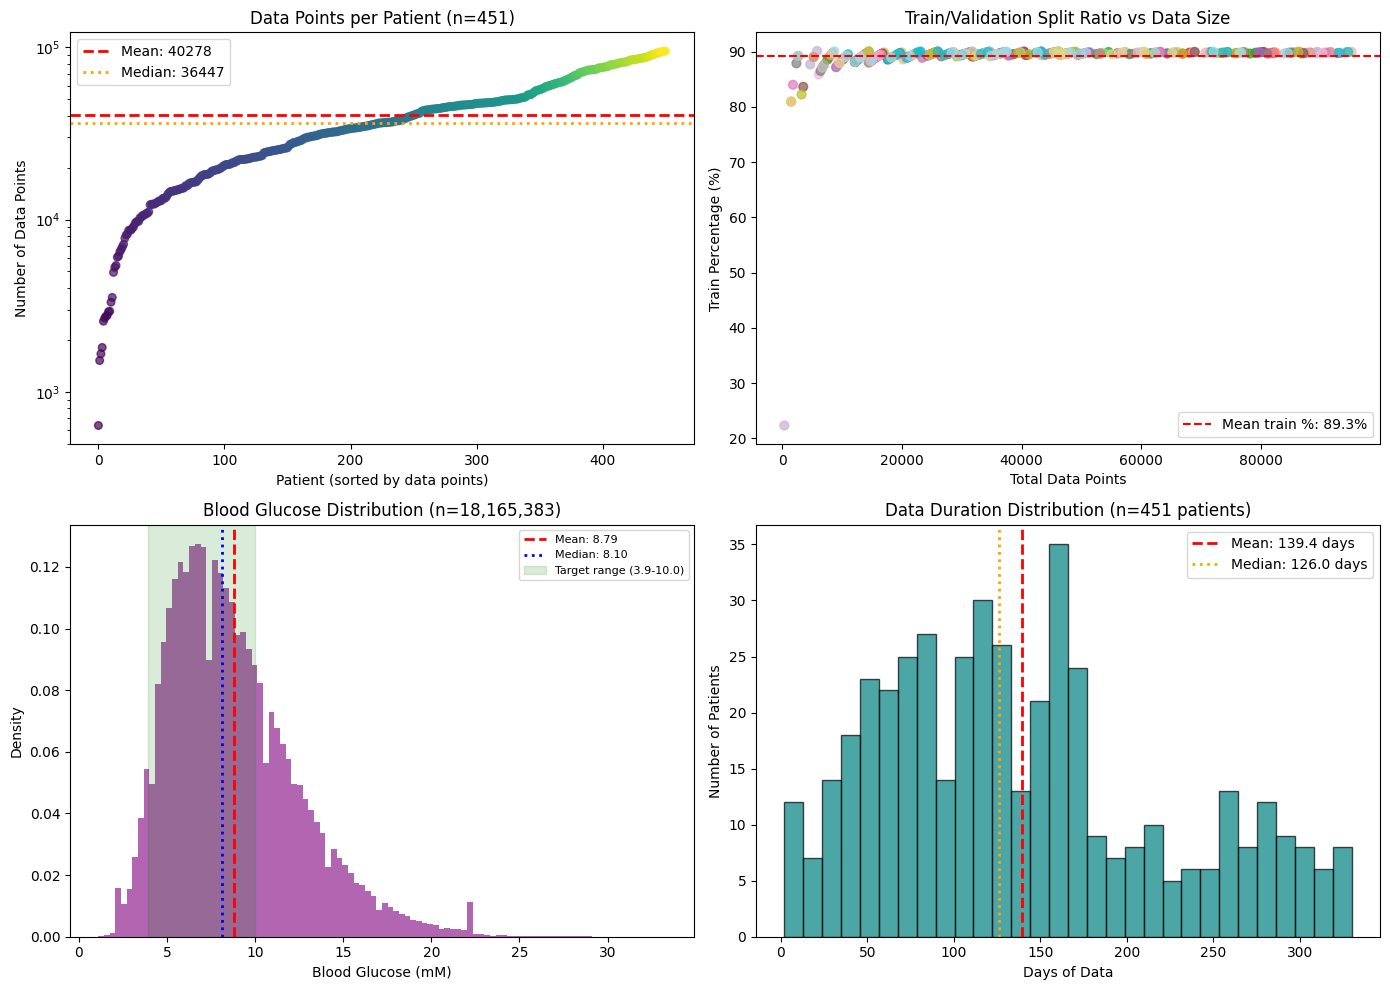

In [15]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

patient_ids = list(loader.processed_data.keys())
data_points = [len(df) for df in loader.processed_data.values()]

# Plot 1: Scatter plot of data points per patient (sorted by size)
ax1 = axes[0, 0]
sorted_indices = np.argsort(data_points)
sorted_points = np.array(data_points)[sorted_indices]
ax1.scatter(range(len(patient_ids)), sorted_points, c=sorted_points, cmap='viridis', s=30, alpha=0.7)
ax1.axhline(y=np.mean(data_points), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(data_points):.0f}')
ax1.axhline(y=np.median(data_points), color='orange', linestyle=':', linewidth=2, label=f'Median: {np.median(data_points):.0f}')
ax1.set_xlabel('Patient (sorted by data points)')
ax1.set_ylabel('Number of Data Points')
ax1.set_title(f'Data Points per Patient (n={len(patient_ids)})')
ax1.legend()
ax1.set_yscale('log') if max(data_points) / min(data_points) > 10 else None

# Plot 2: Train vs Validation ratio scatter
ax2 = axes[0, 1]
if loader.train_data and loader.validation_data:
    train_points = [len(loader.train_data.get(pid, [])) for pid in patient_ids]
    val_points = [len(loader.validation_data.get(pid, [])) for pid in patient_ids]
    total_points = [t + v for t, v in zip(train_points, val_points)]
    train_ratio = [t / tot * 100 if tot > 0 else 0 for t, tot in zip(train_points, total_points)]
    
    scatter = ax2.scatter(total_points, train_ratio, c=range(len(patient_ids)), cmap='tab20', s=40, alpha=0.7)
    ax2.axhline(y=np.mean(train_ratio), color='red', linestyle='--', label=f'Mean train %: {np.mean(train_ratio):.1f}%')
    ax2.set_xlabel('Total Data Points')
    ax2.set_ylabel('Train Percentage (%)')
    ax2.set_title('Train/Validation Split Ratio vs Data Size')
    ax2.legend()
else:
    ax2.text(0.5, 0.5, 'No train/validation split available', ha='center', va='center', transform=ax2.transAxes)

# Plot 3: Blood glucose distribution (histogram with KDE-style smoothing)
ax3 = axes[1, 0]
combined_data = loader.get_combined_data(data_type="all")
bg_col = 'bg_mM' if 'bg_mM' in combined_data.columns else 'bg_mg_dl' if 'bg_mg_dl' in combined_data.columns else None

if bg_col:
    bg_data = combined_data[bg_col].dropna()
    bg_unit = 'mM' if bg_col == 'bg_mM' else 'mg/dL'
    hypo = 3.9 if bg_col == 'bg_mM' else 70
    hyper = 10.0 if bg_col == 'bg_mM' else 180
    
    ax3.hist(bg_data, bins=100, density=True, color='purple', edgecolor='none', alpha=0.6)
    ax3.axvline(x=bg_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {bg_data.mean():.2f}')
    ax3.axvline(x=bg_data.median(), color='blue', linestyle=':', linewidth=2, label=f'Median: {bg_data.median():.2f}')
    ax3.axvspan(hypo, hyper, alpha=0.15, color='green', label=f'Target range ({hypo}-{hyper})')
    ax3.set_xlabel(f'Blood Glucose ({bg_unit})')
    ax3.set_ylabel('Density')
    ax3.set_title(f'Blood Glucose Distribution (n={len(bg_data):,})')
    ax3.legend(fontsize=8)
else:
    ax3.text(0.5, 0.5, 'No blood glucose column found', ha='center', va='center', transform=ax3.transAxes)

# Plot 4: Data duration distribution (histogram)
ax4 = axes[1, 1]
durations = []
for pid, df in loader.processed_data.items():
    if hasattr(df.index, 'min') and hasattr(df.index, 'max'):
        try:
            duration = (df.index.max() - df.index.min()).days
            durations.append(duration)
        except:
            pass

if durations:
    ax4.hist(durations, bins=min(30, len(set(durations))), color='teal', edgecolor='black', alpha=0.7)
    ax4.axvline(x=np.mean(durations), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(durations):.1f} days')
    ax4.axvline(x=np.median(durations), color='orange', linestyle=':', linewidth=2, label=f'Median: {np.median(durations):.1f} days')
    ax4.set_xlabel('Days of Data')
    ax4.set_ylabel('Number of Patients')
    ax4.set_title(f'Data Duration Distribution (n={len(durations)} patients)')
    ax4.legend()

plt.tight_layout()
plt.show()

### 6.2 Per-Patient Blood Glucose Statistics

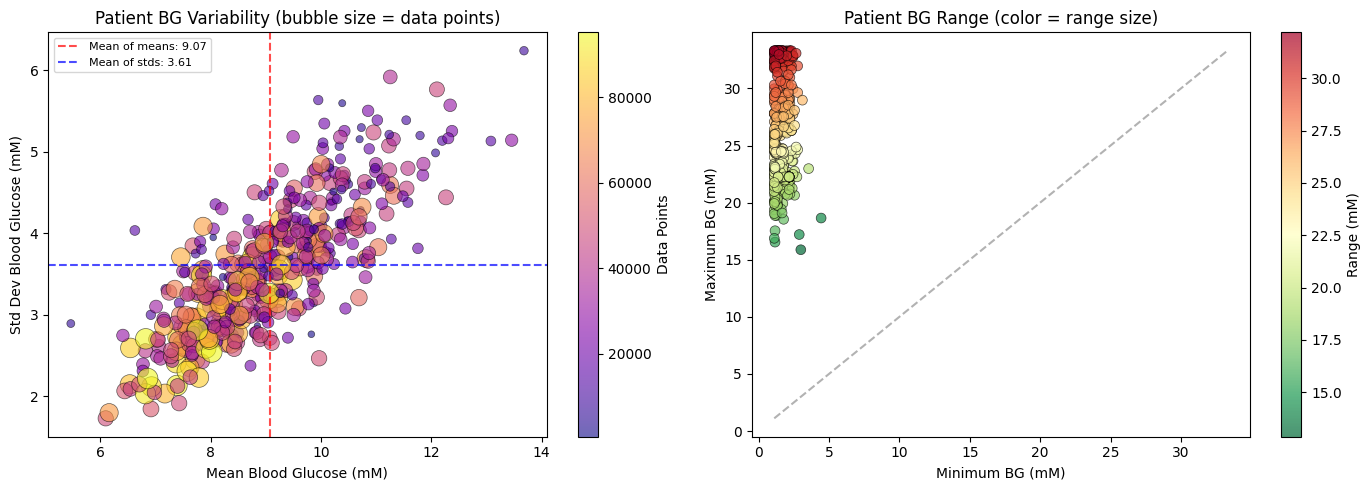


Summary across 451 patients:
  Mean BG: 9.07 ± 1.33 mM
  Mean Std Dev: 3.61 ± 0.82 mM
  Mean Range: 24.00 mM


In [16]:
# Per-patient BG statistics - scatter plot visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

patient_ids = list(loader.processed_data.keys())

# Determine which BG column to use
bg_col = 'bg_mM' if 'bg_mM' in loader.get_combined_data().columns else 'bg_mg_dl'
bg_unit = 'mM' if bg_col == 'bg_mM' else 'mg/dL'

# Calculate per-patient statistics
patient_stats = []
for pid in patient_ids:
    df = loader.processed_data[pid]
    if bg_col in df.columns:
        bg = df[bg_col].dropna()
        if len(bg) > 0:
            patient_stats.append({
                'pid': pid,
                'mean': bg.mean(),
                'std': bg.std(),
                'min': bg.min(),
                'max': bg.max(),
                'count': len(bg)
            })

# Plot 1: Mean vs Std scatter (bubble size = data count)
ax1 = axes[0]
means = [s['mean'] for s in patient_stats]
stds = [s['std'] for s in patient_stats]
counts = [s['count'] for s in patient_stats]

# Normalize counts for bubble size
size_scale = np.array(counts) / max(counts) * 200 + 20

scatter = ax1.scatter(means, stds, s=size_scale, c=counts, cmap='plasma', alpha=0.6, edgecolors='black', linewidth=0.5)
ax1.set_xlabel(f'Mean Blood Glucose ({bg_unit})')
ax1.set_ylabel(f'Std Dev Blood Glucose ({bg_unit})')
ax1.set_title(f'Patient BG Variability (bubble size = data points)')
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label('Data Points')

# Add overall mean lines
ax1.axvline(x=np.mean(means), color='red', linestyle='--', alpha=0.7, label=f'Mean of means: {np.mean(means):.2f}')
ax1.axhline(y=np.mean(stds), color='blue', linestyle='--', alpha=0.7, label=f'Mean of stds: {np.mean(stds):.2f}')
ax1.legend(fontsize=8)

# Plot 2: Min-Max range scatter
ax2 = axes[1]
mins = [s['min'] for s in patient_stats]
maxs = [s['max'] for s in patient_stats]
ranges = [s['max'] - s['min'] for s in patient_stats]

scatter2 = ax2.scatter(mins, maxs, s=50, c=ranges, cmap='RdYlGn_r', alpha=0.7, edgecolors='black', linewidth=0.5)
ax2.plot([min(mins), max(maxs)], [min(mins), max(maxs)], 'k--', alpha=0.3, label='Min=Max line')
ax2.set_xlabel(f'Minimum BG ({bg_unit})')
ax2.set_ylabel(f'Maximum BG ({bg_unit})')
ax2.set_title('Patient BG Range (color = range size)')
cbar2 = plt.colorbar(scatter2, ax=ax2)
cbar2.set_label(f'Range ({bg_unit})')

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nSummary across {len(patient_stats)} patients:")
print(f"  Mean BG: {np.mean(means):.2f} ± {np.std(means):.2f} {bg_unit}")
print(f"  Mean Std Dev: {np.mean(stds):.2f} ± {np.std(stds):.2f} {bg_unit}")
print(f"  Mean Range: {np.mean(ranges):.2f} {bg_unit}")

### 6.3 Time-in-Range Analysis

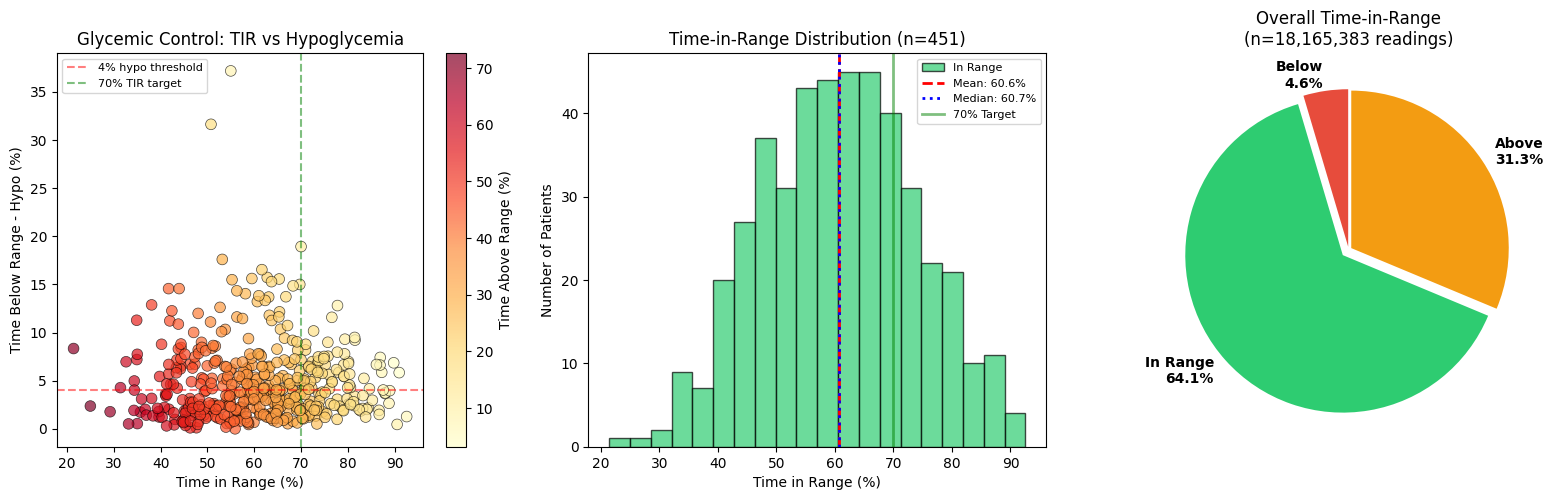


Time-in-Range Summary (451 patients):
  Mean TIR: 60.6% (target: >70%)
  Mean Time Below: 4.8% (target: <4%)
  Mean Time Above: 34.5% (target: <25%)
  Patients meeting 70% TIR: 113/451


In [17]:
# Time-in-Range Analysis - scatter and distribution plots
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Define thresholds based on unit
if bg_col == 'bg_mM':
    target_low, target_high = 3.9, 10.0
else:
    target_low, target_high = 70, 180

# Calculate time-in-range for each patient
tir_stats = []
for pid in patient_ids:
    df = loader.processed_data[pid]
    if bg_col in df.columns:
        bg = df[bg_col].dropna()
        total = len(bg)
        if total > 0:
            below = (bg < target_low).sum() / total * 100
            above = (bg > target_high).sum() / total * 100
            in_range = 100 - below - above
            tir_stats.append({'pid': pid, 'below': below, 'in_range': in_range, 'above': above, 'count': total})

below_pcts = [s['below'] for s in tir_stats]
in_range_pcts = [s['in_range'] for s in tir_stats]
above_pcts = [s['above'] for s in tir_stats]
counts = [s['count'] for s in tir_stats]

# Plot 1: Scatter - Time in Range vs Time Below (hypo risk visualization)
ax1 = axes[0]
scatter1 = ax1.scatter(in_range_pcts, below_pcts, s=60, c=above_pcts, cmap='YlOrRd', 
                        alpha=0.7, edgecolors='black', linewidth=0.5)
ax1.set_xlabel('Time in Range (%)')
ax1.set_ylabel('Time Below Range - Hypo (%)')
ax1.set_title('Glycemic Control: TIR vs Hypoglycemia')
cbar1 = plt.colorbar(scatter1, ax=ax1)
cbar1.set_label('Time Above Range (%)')
ax1.axhline(y=4, color='red', linestyle='--', alpha=0.5, label='4% hypo threshold')
ax1.axvline(x=70, color='green', linestyle='--', alpha=0.5, label='70% TIR target')
ax1.legend(fontsize=8)

# Plot 2: Distribution of Time-in-Range (histogram)
ax2 = axes[1]
ax2.hist(in_range_pcts, bins=20, color='#2ECC71', edgecolor='black', alpha=0.7, label='In Range')
ax2.axvline(x=np.mean(in_range_pcts), color='red', linestyle='--', linewidth=2, 
            label=f'Mean: {np.mean(in_range_pcts):.1f}%')
ax2.axvline(x=np.median(in_range_pcts), color='blue', linestyle=':', linewidth=2,
            label=f'Median: {np.median(in_range_pcts):.1f}%')
ax2.axvline(x=70, color='green', linestyle='-', linewidth=2, alpha=0.5, label='70% Target')
ax2.set_xlabel('Time in Range (%)')
ax2.set_ylabel('Number of Patients')
ax2.set_title(f'Time-in-Range Distribution (n={len(tir_stats)})')
ax2.legend(fontsize=8)

# Plot 3: Overall cohort pie chart
ax3 = axes[2]
combined_bg = loader.get_combined_data()[bg_col].dropna()
total = len(combined_bg)

if total > 0:
    overall_below = (combined_bg < target_low).sum() / total * 100
    overall_above = (combined_bg > target_high).sum() / total * 100
    overall_in_range = 100 - overall_below - overall_above
    
    sizes = [overall_below, overall_in_range, overall_above]
    labels = [f'Below\n{overall_below:.1f}%', f'In Range\n{overall_in_range:.1f}%', f'Above\n{overall_above:.1f}%']
    colors = ['#E74C3C', '#2ECC71', '#F39C12']
    explode = (0.02, 0.05, 0.02)
    
    wedges, texts = ax3.pie(sizes, labels=labels, colors=colors, explode=explode, startangle=90,
                             textprops={'fontsize': 10, 'fontweight': 'bold'})
    ax3.set_title(f'Overall Time-in-Range\n(n={total:,} readings)')

plt.tight_layout()
plt.show()

# Print TIR summary
print(f"\nTime-in-Range Summary ({len(tir_stats)} patients):")
print(f"  Mean TIR: {np.mean(in_range_pcts):.1f}% (target: >70%)")
print(f"  Mean Time Below: {np.mean(below_pcts):.1f}% (target: <4%)")
print(f"  Mean Time Above: {np.mean(above_pcts):.1f}% (target: <25%)")
print(f"  Patients meeting 70% TIR: {sum(1 for t in in_range_pcts if t >= 70)}/{len(tir_stats)}")

## 7. Sample Data Inspection

Quick look at the actual data content for one patient.

In [18]:
sample_patient_id = loader.patient_ids[0]
sample_df = loader.get_patient_data(sample_patient_id)

print(f"Sample data for patient '{sample_patient_id}':")
print(f"\nFirst 5 rows:")
display(sample_df.head())

print(f"\nLast 5 rows:")
display(sample_df.tail())

print(f"\nData types:")
print(sample_df.dtypes)

Sample data for patient '446':

First 5 rows:


,record_id,p_num,DeviceDtTm,bg_mg_dl,bg_mM,msg_type,datetime.1,glucose_roc,glucose_1h_mean,glucose_1h_std,glucose_3h_mean,glucose_3h_std,in_range,below_range,above_range,hypo_mild,hypo_severe,hyper_mild,hyper_severe,glucose_cv,hour,day_of_week,is_weekend,time_of_day
datetime,,,,,,,,,,,,,,,,,,,,,,,,
2008-01-01 00:00:00,1010798,446,2000-03-19 14:13:00,168,9.323906,cgm,2008-01-01 00:00:00,NaN,8.261488,0.576258,8.605334,0.456715,1,0,0,0,0,0,0,0.069752,0,1,0,night
2008-01-01 00:05:00,1010799,446,2000-03-19 14:08:00,152,8.435915,cgm,2008-01-01 00:05:00,-0.887991,8.338791,0.576576,8.630163,0.458191,1,0,0,0,0,0,0,0.069144,0,1,0,night
2008-01-01 00:10:00,1010800,446,2000-03-19 12:03:00,138,7.658923,cgm,2008-01-01 00:10:00,-0.776992,8.411248,0.581495,8.663198,0.471551,1,0,0,0,0,0,0,0.069133,0,1,0,night
2008-01-01 00:15:00,1010801,446,2000-03-19 11:58:00,140,7.769922,cgm,2008-01-01 00:15:00,0.110999,8.480314,0.590141,8.703321,0.497180,1,0,0,0,0,0,0,0.069590,0,1,0,night
2008-01-01 00:20:00,1010802,446,2000-03-19 11:53:00,142,7.880920,cgm,2008-01-01 00:20:00,0.110999,8.526732,0.580638,8.749607,0.534067,1,0,0,0,0,0,0,0.068096,0,1,0,night



Last 5 rows:


,record_id,p_num,DeviceDtTm,bg_mg_dl,bg_mM,msg_type,datetime.1,glucose_roc,glucose_1h_mean,glucose_1h_std,glucose_3h_mean,glucose_3h_std,in_range,below_range,above_range,hypo_mild,hypo_severe,hyper_mild,hyper_severe,glucose_cv,hour,day_of_week,is_weekend,time_of_day
datetime,,,,,,,,,,,,,,,,,,,,,,,,
2008-08-05 01:25:00,11367158,446,2001-03-05 21:00:00.000000,274,15.206846,cgm,2008-08-05 01:25:00,0.000000,15.173547,0.578071,16.306744,1.278913,0,0,1,0,0,1,1,0.038097,1,1,0,night
2008-08-05 01:30:00,11367159,446,2001-03-05 20:55:00.000000,274,15.206846,cgm,2008-08-05 01:30:00,0.000000,15.083514,0.533616,16.200551,1.207021,0,0,1,0,0,1,1,0.035377,1,1,0,night
2008-08-05 01:35:00,11367160,446,2001-03-05 20:50:00.000000,272,15.095848,cgm,2008-08-05 01:35:00,-0.110999,15.012598,0.523160,16.100387,1.145340,0,0,1,0,0,1,1,0.034848,1,1,0,night
2008-08-05 01:40:00,11367161,446,2001-03-05 20:45:00.000000,264,14.651852,cgm,2008-08-05 01:40:00,-0.443996,14.937278,0.516104,16.007207,1.096075,0,0,1,0,0,1,1,0.034551,1,1,0,night
2008-08-05 01:45:00,11367162,446,2001-03-05 20:40:00.000000,250,13.874860,cgm,2008-08-05 01:45:00,-0.776992,14.873850,0.534641,15.909839,1.039869,0,0,1,0,0,1,0,0.035945,1,1,0,night



Data types:
record_id            int64
p_num                int64
DeviceDtTm          object
bg_mg_dl             int64
bg_mM              float64
msg_type            object
datetime.1          object
glucose_roc        float64
glucose_1h_mean    float64
glucose_1h_std     float64
glucose_3h_mean    float64
glucose_3h_std     float64
in_range             int64
below_range          int64
above_range          int64
hypo_mild            int64
hypo_severe          int64
hyper_mild           int64
hyper_severe         int64
glucose_cv         float64
hour                 int64
day_of_week          int64
is_weekend           int64
time_of_day         object
dtype: object


In [19]:
# Basic statistics for numeric columns
print(f"\nDescriptive statistics for patient '{sample_patient_id}':")
display(sample_df.describe())


Descriptive statistics for patient '446':


,record_id,p_num,bg_mg_dl,bg_mM,glucose_roc,glucose_1h_mean,glucose_1h_std,glucose_3h_mean,glucose_3h_std,in_range,below_range,above_range,hypo_mild,hypo_severe,hyper_mild,hyper_severe,glucose_cv,hour,day_of_week,is_weekend
count,6.251800e+04,62518.0,62518.000000,62518.000000,62517.000000,62518.000000,62518.000000,62518.000000,62518.000000,62518.000000,62518.000000,62518.000000,62518.000000,62518.000000,62518.000000,62518.000000,62518.000000,62518.000000,62518.000000,62518.000000
mean,4.681911e+06,446.0,202.805208,11.255575,0.000073,11.255636,1.923072,11.255710,2.725429,0.417800,0.020314,0.561886,0.020314,0.006782,0.561886,0.266147,0.174363,11.496113,2.999296,0.285614
std,3.283248e+06,0.0,82.752890,4.592739,2.740036,3.858726,1.751936,3.354944,1.640503,0.493201,0.141074,0.496159,0.141074,0.082074,0.496159,0.441946,0.151099,6.924130,2.000016,0.451710
min,4.448280e+05,446.0,26.000000,1.442985,-26.417733,2.090479,0.000000,2.121312,0.080821,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.156140e+06,446.0,140.000000,7.769922,-0.332997,8.565413,0.520272,9.037159,1.302475,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051155,5.000000,1.000000,0.000000
50%,3.828310e+06,446.0,194.000000,10.766891,0.000000,11.099888,1.316763,11.275636,2.618949,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.125934,11.000000,3.000000,0.000000
75%,7.513505e+06,446.0,256.000000,14.207857,0.221998,13.551113,2.939443,13.122534,3.812798,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.262691,17.000000,5.000000,1.000000
max,1.136716e+07,446.0,600.000000,33.299664,26.528732,32.615171,10.431367,30.888521,11.223471,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.021762,23.000000,6.000000,1.000000


## 8. Validation Summary

Final checks to confirm the data loader is working correctly.

In [20]:
print("="*60)
print("VALIDATION SUMMARY")
print("="*60)

checks = [
    ("dataset_name property", loader.dataset_name is not None),
    ("num_patients property", loader.num_patients > 0),
    ("patient_ids property", len(loader.patient_ids) > 0),
    ("processed_data populated", loader.processed_data is not None and len(loader.processed_data) > 0),
    ("train_data populated", loader.train_data is not None and len(loader.train_data) > 0),
    ("validation_data populated", loader.validation_data is not None and len(loader.validation_data) > 0),
    ("get_patient_data() works", loader.get_patient_data(loader.patient_ids[0]) is not None),
    ("get_combined_data() works", not loader.get_combined_data().empty),
]

all_passed = True
for check_name, passed in checks:
    status = "✅ PASS" if passed else "❌ FAIL"
    print(f"  {status}: {check_name}")
    if not passed:
        all_passed = False

print("="*60)
if all_passed:
    print("All validation checks PASSED!")
else:
    print("Some validation checks FAILED. Please review.")

VALIDATION SUMMARY
  ✅ PASS: dataset_name property
  ✅ PASS: num_patients property
  ✅ PASS: patient_ids property
  ✅ PASS: processed_data populated
  ✅ PASS: train_data populated
  ✅ PASS: validation_data populated
  ✅ PASS: get_patient_data() works
  ✅ PASS: get_combined_data() works
All validation checks PASSED!
